# Data Cleaning and EDA 
----

Have 10000 comments each from r/formuladank and r/formula1

In [40]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from bs4 import BeautifulSoup

from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer

from sklearn.feature_extraction.text import CountVectorizer

In [41]:
# Data Imports
fd = pd.read_csv('../data/formuladank_comments.csv')
f1 = pd.read_csv('../data/formula1_comments.csv')
fd_t = pd.read_csv('../data/formuladank_titles.csv')
f1_t = pd.read_csv('../data/formula1_titles.csv')

In [42]:
# Create Function to remove any potential html, and lower case words (Pulled from Katie Sylvia's breakfast hour lesson/review)
def remove_html(review):
    '''function to remove html and lowercase all text'''
    review = review.lower()
    # remove html
    no_html = BeautifulSoup(review).text
    return no_html

In [43]:
# Create a column of clean comments
fd['clean_body'] = fd['body'].apply(remove_html)
f1['clean_body'] = f1['body'].apply(remove_html)

C:\Users\rmped\miniconda3\envs\dsi\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(
C:\Users\rmped\miniconda3\envs\dsi\lib\site-packages\bs4\__init__.py:404: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(
C:\Users\rmped\miniconda3\envs\dsi\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(
C:\Users\rmped\miniconda3\envs\dsi\lib\site-packages\bs4\__init__.py:404: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the 

In [44]:
# Make sure it was applied properly
fd.head()

,subreddit,body,author_flair_text,clean_body
0,formuladank,Yeah but Kimi's also the most experienced F1 d...,Bwoah,yeah but kimi's also the most experienced f1 d...
1,formuladank,What is actually happening in the original wit...,Claire Williams is waifu material,what is actually happening in the original wit...
2,formuladank,Yeah insane,BWOAHHHHHHH,yeah insane
3,formuladank,Hamilton did it before at the Germany slip n s...,NaN,hamilton did it before at the germany slip n s...
4,formuladank,[removed],NaN,[removed]


In [45]:
# Merge dataframes to create one 
df = pd.concat([fd, f1], axis=0)

In [46]:
df.shape

(20000, 4)

### We have nulls in our flair text column

In [47]:
df.isnull().sum()

subreddit               0
body                    0
author_flair_text    4273
clean_body              0
dtype: int64

In [48]:
df.fillna('flairless', inplace = True)

In [51]:
# Drop duplicates
df.drop_duplicates(subset = 'body', inplace = True)
df.shape

(18513, 4)

In [63]:
df['author_flair_text'].value_counts()

BWOAHHHHHHH                                                     5572
flairless                                                       3135
:mclaren: McLaren                                                429
:formula-1-2018: Formula 1                                       330
mission spinnow                                                  284
                                                                ... 
they race me so hard                                               1
aramcoaramcoaramcoaramcoaramcoaramcoaramcoaramcoaramcoaramco       1
i edited my flair and now i’m inferior to u/sid-16 hahaha          1
Daddy Ric uwu                                                      1
:alberto-ascari: Alberto Ascari                                    1
Name: author_flair_text, Length: 673, dtype: int64

In [52]:
df.to_csv('../data/subreddit_comments.csv', index = False)

In [53]:
# Baseline
df['subreddit'].value_counts()

formuladank    9386
formula1       9127
Name: subreddit, dtype: int64

### Basic CountVectorizer to show top words
---

In [85]:
# Read in dataframe
df_test = pd.read_csv('../data/subreddit_comments.csv')

In [86]:
X = df_test['clean_body']
y = df_test['subreddit']

In [87]:
cvec = CountVectorizer()

In [88]:
cvec.fit(X)

CountVectorizer()

In [89]:
X_new = cvec.transform(X)

In [90]:
# Check number of features created
X_new.shape

(18513, 19557)

In [91]:
cv_df = pd.DataFrame(X_new.todense(), columns = cvec.get_feature_names_out())

In [92]:
cv_df['1_or_dank'] = y.values

In [93]:
cv_df['1_or_dank'] = cv_df['1_or_dank'].map({'formuladank': 0, 'formula1': 1})

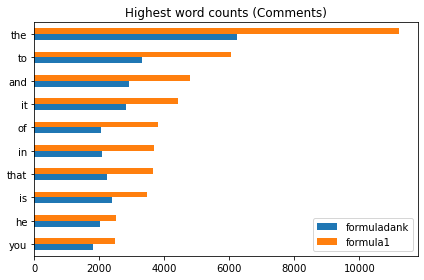

In [94]:
# Pulled from Hank's lesson (nlp-2)

cv_df.groupby('1_or_dank').sum().T.sort_values(1, ascending = True).tail(10).plot.barh()
plt.title('Highest word counts (Comments)')
plt.legend(labels = ['formuladank', 'formula1'])
plt.tight_layout()
plt.savefig('../images/wc_comments.png');

Every single one of these is a stop word, we may benefit greatly from removing them.

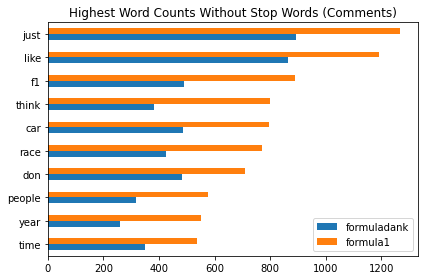

In [83]:
# The above, but with stop words removed
X = df['body']
y = df['subreddit']
cvec = CountVectorizer(stop_words = 'english')
X_new = cvec.fit_transform(X)
cv_df = pd.DataFrame(X_new.todense(), columns = cvec.get_feature_names_out())
cv_df['1_or_dank'] = y.values
cv_df['1_or_dank'] = cv_df['1_or_dank'].map({'formuladank': 0, 'formula1': 1})
cv_df.groupby('1_or_dank').sum().T.sort_values(1, ascending = True).tail(10).plot.barh()
plt.title('Highest Word Counts Without Stop Words (Comments)')
plt.legend(labels = ['formuladank', 'formula1'])
plt.tight_layout()
plt.savefig('../images/wc_comments_no_stop.png');

----
# Title dataframes

In [54]:
df_t = pd.concat([fd_t, f1_t], axis=0)

In [55]:
df_t.shape

(10000, 3)

In [56]:
df_t.head()

,subreddit,title,author_flair_text
0,formuladank,Honestly I need a simple answer. Please,BWOAHHHHHHH
1,formuladank,Yuki Tsunochill,NaN
2,formuladank,Take 3,BWOAHHHHHHH
3,formuladank,formuladank Subreddit Statistics,BWOAHHHHHHH
4,formuladank,We Are just pure racist,NaN


### Checking for duplicates 

In [57]:
df_t.drop_duplicates(subset = 'title', inplace = True)
df_t.shape

(9578, 3)

In [60]:
df_t.fillna('flairless', inplace = True)

### Export

In [61]:
df_t.to_csv('../data/subreddit_titles.csv', index = False)

### Baseline

In [59]:
df_t['subreddit'].value_counts(normalize = True)

formuladank    0.503445
formula1       0.496555
Name: subreddit, dtype: float64

### Count Vectorizer to show top words

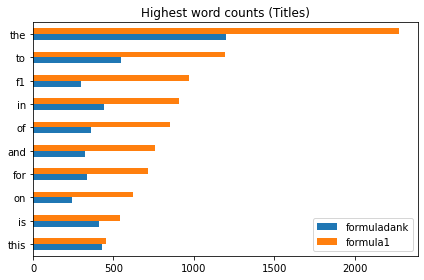

In [82]:
# The same as done above for comments
X = df_t['title']
y = df_t['subreddit']
cvec = CountVectorizer()
X_new = cvec.fit_transform(X)
cv_df_t = pd.DataFrame(X_new.todense(), columns = cvec.get_feature_names_out())
cv_df_t['1_or_dank'] = y.values
cv_df_t['1_or_dank'] = cv_df_t['1_or_dank'].map({'formuladank': 0, 'formula1': 1})
cv_df_t.groupby('1_or_dank').sum().T.sort_values(1, ascending = True).tail(10).plot.barh()
plt.title('Highest word counts (Titles)')
plt.legend(labels = ['formuladank', 'formula1'])
plt.tight_layout()
plt.savefig('../images/wc.png');

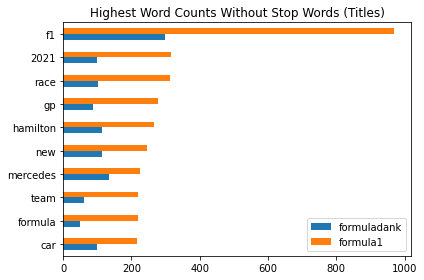

In [81]:
# The above, but with stop words removed
# The same as done above for comments
X = df_t['title']
y = df_t['subreddit']
cvec = CountVectorizer(stop_words = 'english')
X_new = cvec.fit_transform(X)
cv_df_t = pd.DataFrame(X_new.todense(), columns = cvec.get_feature_names_out())
cv_df_t['1_or_dank'] = y.values
cv_df_t['1_or_dank'] = cv_df_t['1_or_dank'].map({'formuladank': 0, 'formula1': 1})
cv_df_t.groupby('1_or_dank').sum().T.sort_values(1, ascending = True).tail(10).plot.barh()
plt.title('Highest Word Counts Without Stop Words (Titles)')
plt.legend(labels = ['formuladank', 'formula1'])
plt.tight_layout()
plt.savefig('../images/wc_no_stop.png');

#### How many flairless users per subreddit?

In [98]:
df_t.groupby('subreddit')['author_flair_text'].value_counts()

subreddit    author_flair_text                  
formula1     flairless                              2205
             :mclaren: McLaren                       167
             :lewis-hamilton: Sir Lewis Hamilton     150
             :formula-1-2018: Formula 1              129
             :ferrari: Ferrari                       109
                                                    ... 
formuladank  right up thereOHIMSORRY                   1
             some Driver that you used to know         1
             s🅱️inala                                  1
             s🅱️innahutzen                             1
             ✔ For Sure                                1
Name: author_flair_text, Length: 433, dtype: int64

In [99]:
df.groupby('subreddit')['author_flair_text'].value_counts()

subreddit    author_flair_text                  
formula1     flairless                              3088
             :mclaren: McLaren                       429
             :formula-1-2018: Formula 1              330
             :ferrari: Ferrari                       233
             :lewis-hamilton: Sir Lewis Hamilton     197
                                                    ... 
formuladank  s🅱️inala                                  1
             the Maldonator                            1
             they race me so hard                      1
             tripping major nutsack                    1
             🅱️WO🅰️HHHHHHH                             1
Name: author_flair_text, Length: 678, dtype: int64

Vast majority of flairless users in formula1